### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import random

In [18]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
datasets = pd.read_csv(url)

In [19]:
datasets.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
x = datasets.drop(['species'],axis=True)
y = datasets['species']

In [36]:
# apply PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA x', 'PCA y', 'PCA z'])

In [37]:
principalDf.head()

,PCA x,PCA y,PCA z
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230


In [38]:
finalDf = pd.concat([principalDf, datasets[['species']]], axis = 1)

In [39]:
x_vals = finalDf['PCA x']
y_vals = finalDf['PCA y']
z_vals = finalDf['PCA z']

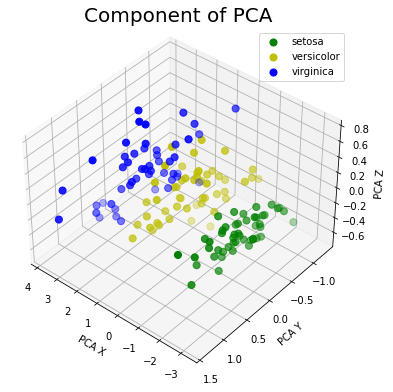

In [40]:

# Create the figure
fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_xlabel('PCA X', fontsize = 10)
ax.set_ylabel('PCA Y', fontsize = 10)
ax.set_zlabel('PCA Z', fontsize = 10)
ax.set_title('Component of PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['g', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA x']
               , finalDf.loc[indicesToKeep, 'PCA y']
               , finalDf.loc[indicesToKeep, 'PCA z']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()